
#  PETE 2061 Final Examination (PART 2)

## THIS IS DUE BY 2:30 PM

## Instructions
* You will be video-monitored, and any violation of the LSU Code of Student Conduct will be reported to the Office of Student Advocacy and Accountability (SAA).
* This is an open book exam. You may use cheat sheets, lecture notes and lab notebooks in soft or hard copies. 
* You are not allowed to use the internet or your cell phones. 
* You can download all lecture materials before the exam starts, but not during the exam.
* You are not allowed to start with this section of the finals until the first part is completed.
* Make sure you save often, and be sure you know where the file you are working on is being saved.
* The "Volve production data.xlsx" is attached

# Volumetric Reserves Estimation
The Stock-tank Oil Initially In Place (STOIIP) is the amount of oil (in stb) that is stored in an oil reservoir. Assuming that the pore spaces in the reservoir are filled with water and oil only, the STOIIP can be estimated using the formula:<br><br>
$STOIIP = 7758 Ah\phi(1-S_{wi})/B_{oi}$ <br><br>
where $A$ is the area of the reservoir in acres, <br>
$h$ is the reservoir thickness in feet (ft), <br>
$S_{wi}$ is the initial water saturation of the reservoir. It is the ratio of the volume of water initially in the reservoir to the total pore volume in the reservoir. It can either be expressed as a fraction or percentage. <br>
$B_{oi}$ is the initial oil formation volume factor. It is the ratio of the volume of oil at reservoir conditions (measured in units of reservoir barrels, rb) to the volume of oil at standard conditions (measured in units of stock tank barrels, stb). This means that the unit of $B_{oi}$ is $\frac{rb}{stb}$ <br>
$\phi$ is the porosity of the reservoir. It is the ratio of the pore volume to the bulk volume, and can be expressed as a fraction or in percentage. <br>
7758 is the conversion factor from acre-ft to barrels (bbl or rb) <br><br>

1 (a). **[5 points]** Given the values below for Reservoir A, write a Python code that calculates and prints the STOIIP value and its unit (stb). <br>
A = 250  $\hspace{22pt}$ # in acres <br>
h = 50 $\hspace{27pt}$ # in feet <br>
$\phi$ = 0.33 $\hspace{19pt}$ # fraction<br>
$S_{wi}$ = 0.25 $\hspace{15pt}$ # fraction<br>
$B_{oi}$ = 1.1 $\hspace{19pt}$ # rb/stb <br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3



In [2]:
A = 250
h = 50
phi = 0.33
S_w = 0.25
B_i = 1.1
CF = 7758

numerator = CF * A * h * phi * (1 - S_w)

STOIIP = numerator / B_i

print(f"{STOIIP} bbls")

21819375.0 bbls


(b) **[5 points]** Ten other reservoirs were discovered above Reservoir A, but have much smaller thicknesses (<12 ft). These 10 reeservoirs have identical values for all reservoir parameters given in problem (1 a) above, except that their thicknesses range from 1 to 11 ft, in increments of 1 ft. Write a Python code that displays the thickness and STOIIP values for each of the ten reservoirs. These should be displayed as a DataFrame containing two columns--thickness and STOIIP.

In [3]:
phi = np.arange(1,11,1)
#print(phi)

numerator = CF * A * h * phi * (1 - S_w)
stoiip = (numerator / B_i)
df = pd.DataFrame({'Thickness':phi,'STOIIP':stoiip})
df

,Thickness,STOIIP
0,1,6.611932e+07
1,2,1.322386e+08
2,3,1.983580e+08
3,4,2.644773e+08
4,5,3.305966e+08
5,6,3.967159e+08
6,7,4.628352e+08
7,8,5.289545e+08
8,9,5.950739e+08
9,10,6.611932e+08


## Visualization of Volve Data
2 (a) **[0 points]**  Open the first tab of the attached Excel sheet with Microsoft Excel and observe that Column D contains the well names; Columns J and K contain the average bottomhole pressure and temperature, respectively; Column R contains the choke sizes; Columns S, T and U contain the daily oil, gas and water production rates, respectively; Column V contains the daily water injection rates; while Column W tells you whether the well is a production well or an injection well. <br>
  (b) **[5 points]** Write a Python code that will import both the daily production data and the monthly production data from the attached "Volve production data.xlsx" file. Store the imported data into named DataFrames; one for the daily data and the other for the monthly data <br>
  (c) **[5 points]**  Find the wellbore codes for all the wells in the daily Volve production data by using the .unique() function on "NPD_WELL_BORE_CODE" column of the data frame. eg. myDataFrame['column_name'].unique() <br>
  (d) **[5 points]**  Write a Python code that will create a database named "Volve.db". <br>
  (e) **[5 points]**  Store the daily production data loaded from "Volve production data.xlsx" into a Database table named "DailyRates". <br>
  (f) **[5 points]**  Store the monthly production data loaded from "Volve production data.xlsx" into a Database table named "MonthlyRates". <br>
  (g) **[7 points]**  In a for loop, query the DailyRates table for the data needed to plot both the daily oil production rate and average bottomhole pressure versus time for each well. Plot the daily oil production rate on the primary y-axis, and the average bottomhole pressure on the secondary y-axis. The x-axis is time, running from 0 to the last day of production. It could be ommitted in the plotting function. <br>
  (h) **[8 points]**  Look at all the plots generated, and observe that the oil production is mostly zero for injection wells. You can see which wells are injection wells in column W of "Volve production data.xlsx". Modify your solution to (g) above to plot daily water injection rate instead of daily oil production rate for these injection wells. Do not plot average pressures for the injection wells. <br>
Hint:
* If you are using the code template from the finals review session, the wellbore codes for each well will be displayed as the legend.
* You can store these wellbore codes for the injection wells into a list, then use an if statement to decide wheter to read the daily oil rate or the daily water injection rate from the DailyRates table. <br>
* Use the pandas read_sql_query() command to read the needed data directly into a DataFrame

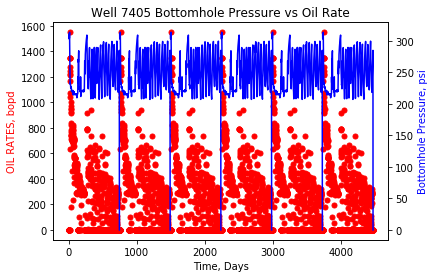

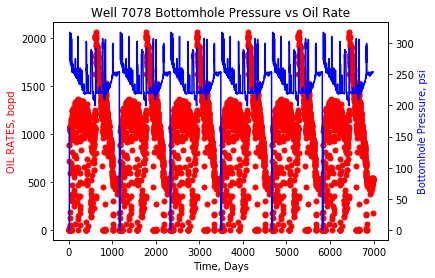

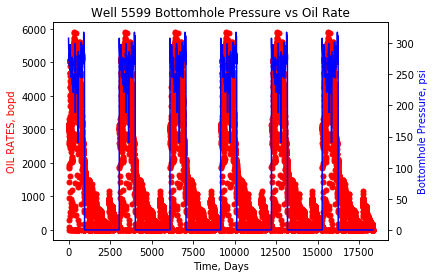

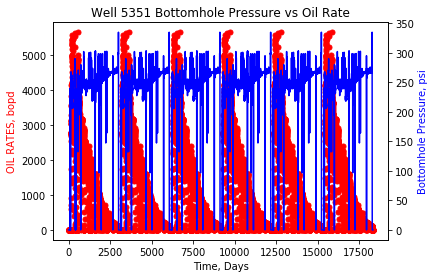

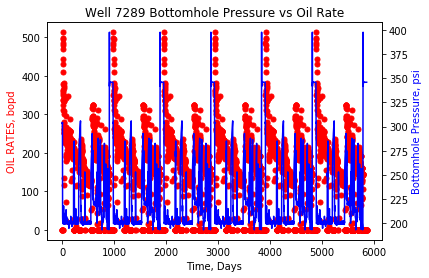

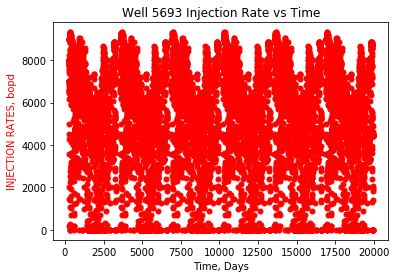

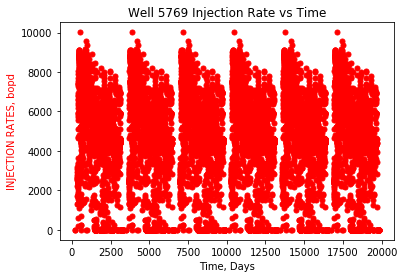

In [11]:
xl = pd.ExcelFile('Volve production data.xlsx')

df1 = xl.parse('Daily Production Data')
df2 = xl.parse('Monthly Production Data')
WBcodes = df1['NPD_WELL_BORE_CODE'].unique()
IJwells = (5693, 5769)


#conn = sqlite3.connect("Volve.db") 


#cur = conn.cursor()

#df1.to_sql("DailyRates", conn, if_exists = "append", index = False)

#df2.to_sql("MonthlyRates", conn, if_exists = "append", index = False)

for wellID in WBcodes:
    dailyDF = pd.read_sql_query(f"SELECT AVG_DOWNHOLE_PRESSURE, BORE_OIL_VOL, BORE_WI_VOL, WELL_TYPE FROM DailyRates WHERE NPD_WELL_BORE_CODE = {wellID} ;" , conn)
    if wellID in IJwells: #note: I attempted to call the wellID from where WELL_TYPE is == WI, but ran into syntax errors. I wanted to show graphs, so I used brute force, although it is not the proper method.
        fig, ax1 = plt.subplots()

    
        ax1.plot(dailyDF['BORE_WI_VOL'], color="red", ls='None', marker='o', markersize=5,)
    

    
        ax1.set_xlabel('Time, Days')
        ax1.set_ylabel('INJECTION RATES, bopd', color='r')
        plt.title(f'Well {wellID} Injection Rate vs Time')
    
        plt.show()
    
    else:
        fig, ax1 = plt.subplots()

        ax2 = ax1.twinx()
        ax1.plot(dailyDF['BORE_OIL_VOL'], color="red", ls='None', marker='o', markersize=5,)
        ax2.plot(dailyDF['AVG_DOWNHOLE_PRESSURE'], 'b-')

    
        ax1.set_xlabel('Time, Days')
        ax1.set_ylabel('OIL RATES, bopd', color='r')
        ax2.set_ylabel('Bottomhole Pressure, psi', color='b')
        plt.title(f'Well {wellID} Bottomhole Pressure vs Oil Rate')
    
        plt.show()
    



